In [1]:
#Notes
# if x is continuous(make scatter)(correlation)
# if categorical (groupby aggregate)(sidebyside box plot)(check for central tendency)
# report:which variable is impacting price
# are there correlation,how would you deal with them

30112022_try:   
bedroom ,bathroom -sqrt transform  
price-log transform  
develop new feature -age of house,with/without basement(0&1)  
exponential transform - for very small values  

record  
r2  
train error  
validation error  


#### 1. IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

import warnings
warnings.filterwarnings("ignore")

#### 2. READING THE FILE

In [3]:
data = pd.read_csv(r'C:\Users\Al barak\Downloads\kc_house_data.csv')
data.columns.value_counts().sum()

21

#### 3. MAKING A COPY OF ORIGINAL DATASET TO WORKON

In [4]:
data1 = data.copy()

#### 4. INFORMATION ABOUT THE DATASET

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


#### 5.SPLITTING THE DATASET

In [6]:
# splitting data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
# Specifying Independent and Target Variable
X = data1.drop("price",axis=1)
y = data1["price"]

In [8]:
# Shape 
data1.shape

(21613, 21)

In [9]:
#Split raw_data to 70:30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =42)

In [10]:
#Shape of splited data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 20)
(6484, 20)
(15129,)
(6484,)


#### 6.CONCATING THE TRAIN DATA FOR EASINESS OF EDA

In [11]:
# Combining X_train,y_train for easiness of EDA
t_y = pd.DataFrame(y_train)
Xy_train = pd.concat([X_train,t_y],axis=1,join= "inner")
Xy_train.shape

(15129, 21)

#### 7. EXPLORATORY DATA ANALYSIS

In [12]:
Xy_train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

#### 7a.UNIVARIATE ANALYSIS

##### <U>1.Count plot

In [13]:
#Creating a function to make frequency plot
def count_plot(var):
    plt.figure(figsize=(6,3))
    sns.countplot(data1[var],data = data1, palette='hls')
    plt.xticks(rotation = 90)
    plt.title("No of Houses"+" vs "+var)
    return (plt.show())

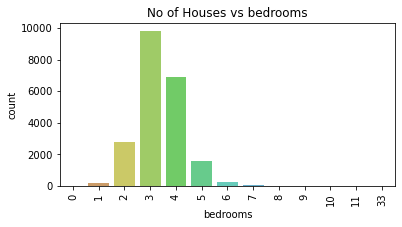

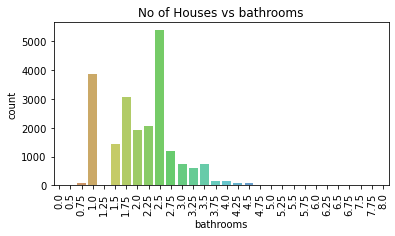

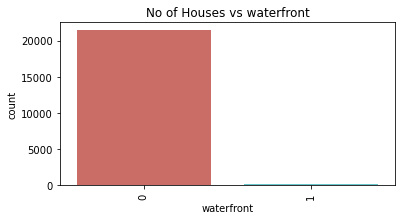

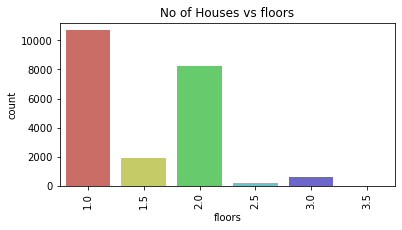

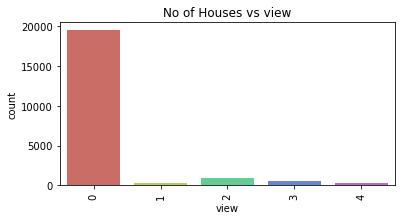

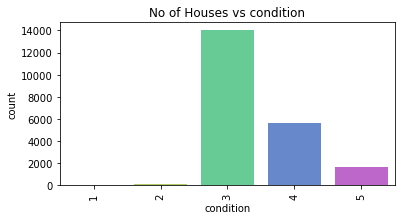

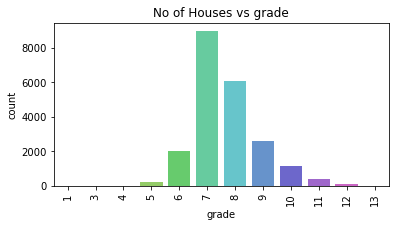

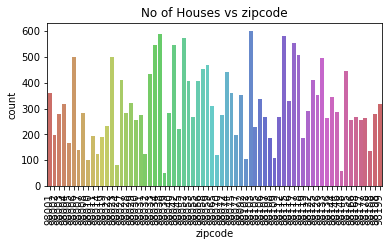

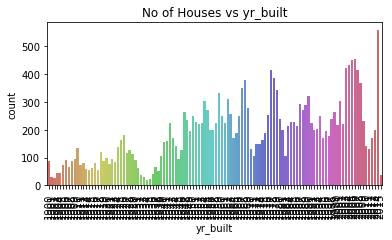

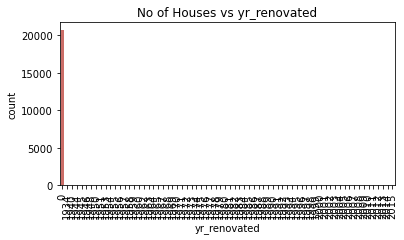

In [14]:
#Categorical and Discrete numerical for frequency plot
cat_var = ['bedrooms','bathrooms','waterfront','floors','view','condition','grade','zipcode','yr_built','yr_renovated']
for i in cat_var:
    count_plot(i)

##### <U> 2.Histogram

In [15]:
#Frequency plot of Numerical Variables
def hist(var):
    plt.figure(figsize=(6,3))
    sns.histplot(Xy_train[var])
    plt.xticks(rotation = 90)
    plt.title("Frequency Distribution "+  var)
    return (plt.show())

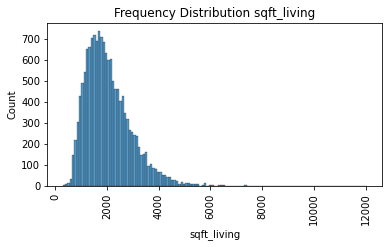

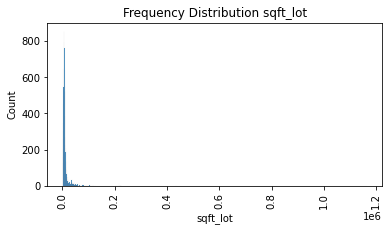

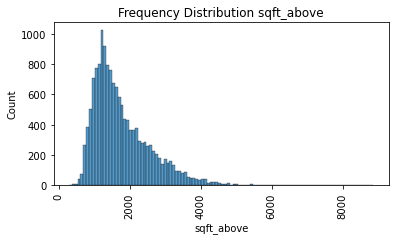

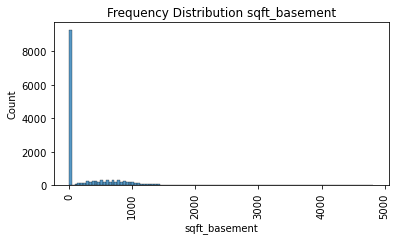

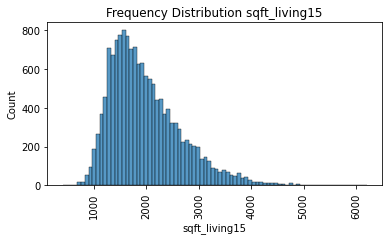

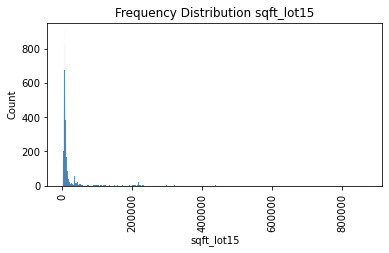

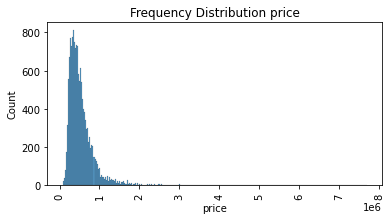

In [16]:
#Numerical variables from dataset
Num_var = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','price']
for i in Num_var:
    hist(i)

##### <u> 3.Box plot

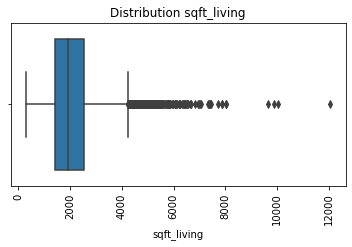

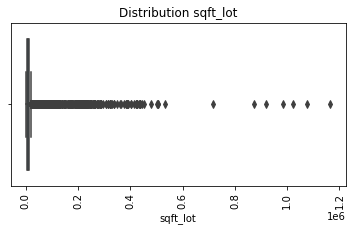

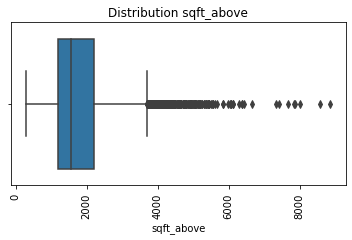

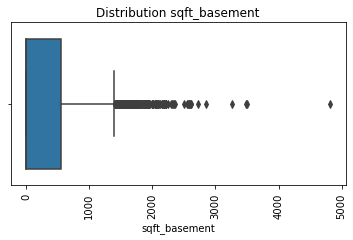

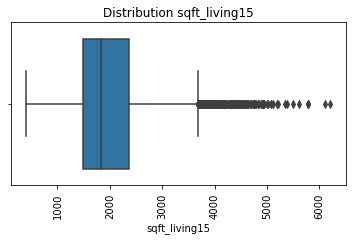

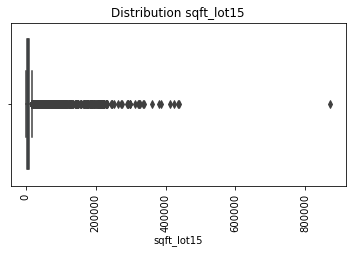

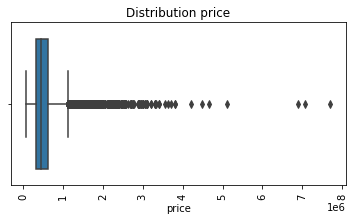

In [17]:
def box(var):
    plt.figure(figsize=(6,3))
    sns.boxplot(Xy_train[var])
    plt.xticks(rotation = 90)
    plt.title("Distribution "+  var)
    return (plt.show())

Num_var = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','price']
for i in Num_var:
    box(i)

###### <U>INSIGHTS FROM UNIVARIATE:

#### 7b.BIVARIATE & MULTIVARIATE ANALYSIS w.r.t TARGET VARIABLE "PRICE"

#####  <u>1.Overall Correlation plot showing the strength of relationship

In [18]:
corr= Xy_train.corr()
corr.style.background_gradient()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.003770,0.005807,-0.011047,-0.139581,0.016917,-0.009354,0.005346,-0.025248,0.008262,-0.009464,-0.005100,0.025425,-0.020949,-0.006167,-0.003780,0.017019,-0.002518,-0.144802,-0.018126
bedrooms,0.003770,1.000000,0.514100,0.571408,0.032922,0.174930,-0.016160,0.067719,0.027017,0.352756,0.471758,0.297825,0.151177,0.020731,-0.156328,-0.013708,0.130304,0.384261,0.026539,0.305965
bathrooms,0.005807,0.514100,1.000000,0.752778,0.085667,0.506395,0.054351,0.177997,-0.129141,0.665649,0.684781,0.272992,0.504154,0.053835,-0.206184,0.026642,0.225798,0.565191,0.076886,0.527273
sqft_living,-0.011047,0.571408,0.752778,1.000000,0.175524,0.348570,0.089529,0.273095,-0.060081,0.762060,0.877230,0.423955,0.317584,0.058308,-0.207492,0.053754,0.250673,0.755621,0.174586,0.704987
sqft_lot,-0.139581,0.032922,0.085667,0.175524,1.000000,-0.003937,0.027615,0.060493,-0.009827,0.115713,0.185454,0.015023,0.051381,0.018193,-0.135460,-0.083162,0.247345,0.157513,0.719088,0.091672
floors,0.016917,0.174930,0.506395,0.348570,-0.003937,1.000000,0.013746,0.025277,-0.271358,0.459375,0.517323,-0.251223,0.499540,0.010396,-0.056917,0.053110,0.124653,0.272619,-0.011695,0.253288
waterfront,-0.009354,-0.016160,0.054351,0.089529,0.027615,0.013746,1.000000,0.387323,0.022265,0.061233,0.057819,0.077022,-0.038927,0.093086,0.025594,-0.018708,-0.044188,0.071134,0.033691,0.244587
view,0.005346,0.067719,0.177997,0.273095,0.060493,0.025277,0.387323,1.000000,0.050645,0.242958,0.158605,0.268450,-0.059971,0.103048,0.082747,-0.000164,-0.085184,0.274204,0.064159,0.389611
condition,-0.025248,0.027017,-0.129141,-0.060081,-0.009827,-0.271358,0.022265,0.050645,1.000000,-0.147678,-0.159998,0.176902,-0.362669,-0.056964,0.005112,-0.024375,-0.110116,-0.099168,-0.008460,0.028958
grade,0.008262,0.352756,0.665649,0.762060,0.115713,0.459375,0.061233,0.242958,-0.147678,1.000000,0.754606,0.160582,0.447843,0.016486,-0.184321,0.119504,0.204767,0.708890,0.114707,0.667772


In [19]:
#Check Correlation with Price
Xy_train.corr().price

id              -0.018126
bedrooms         0.305965
bathrooms        0.527273
sqft_living      0.704987
sqft_lot         0.091672
floors           0.253288
waterfront       0.244587
view             0.389611
condition        0.028958
grade            0.667772
sqft_above       0.607814
sqft_basement    0.318828
yr_built         0.054027
yr_renovated     0.133591
zipcode         -0.058103
lat              0.308692
long             0.030219
sqft_living15    0.581954
sqft_lot15       0.077863
price            1.000000
Name: price, dtype: float64

##### 7b.<u>Relationship of Numerical variables with Price

##### <u>Scatter Plot

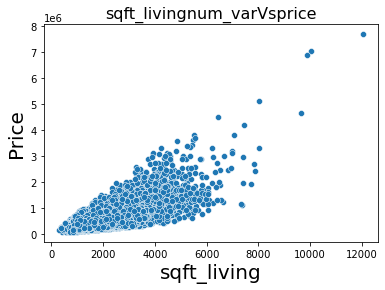

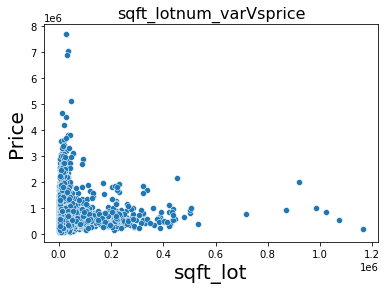

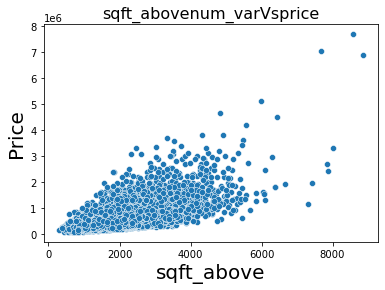

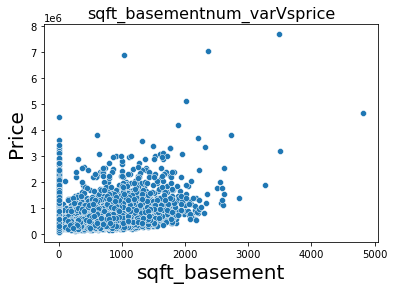

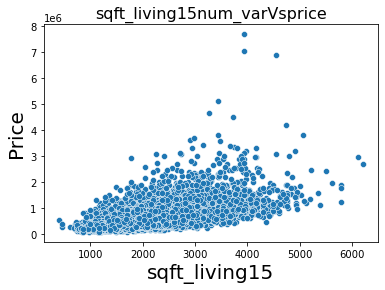

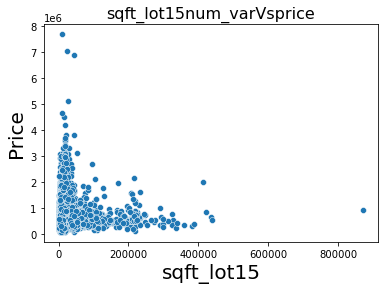

In [20]:
#To understand relationship between Price and Other Continuous numerical variable in the train data
num_var = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
target = ['price']

for i in num_var:
    plt.title(i+"num_var"+"Vs"+"price",fontsize=16)
    sns.scatterplot(Xy_train[i],Xy_train.price)
    plt.xlabel(str(i),fontsize=20)
    plt.ylabel("Price",fontsize=20)
    plt.show()

##### 7c.<u>Relationship of Discrete numerical variables with Price

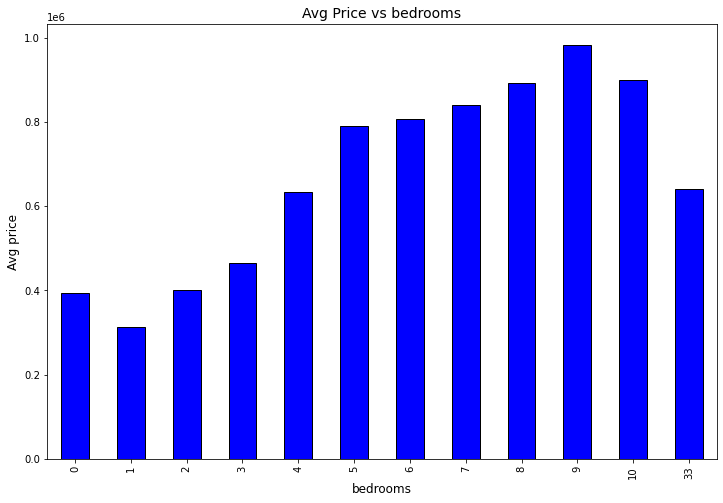

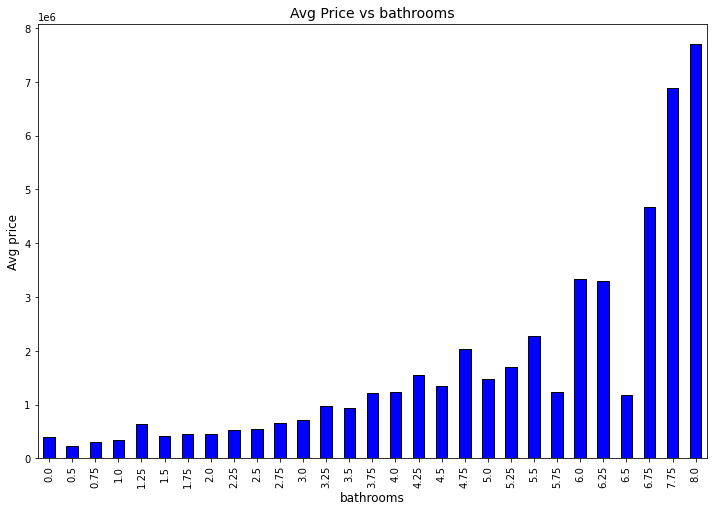

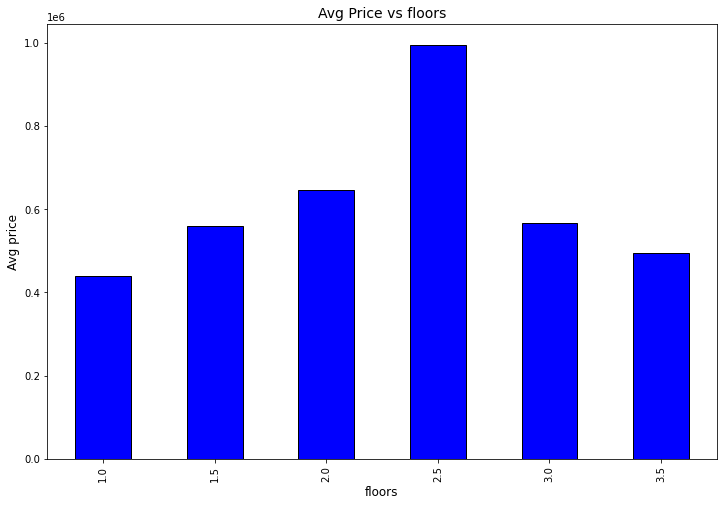

In [21]:
disc_num = ['bedrooms','bathrooms','floors']
for i in disc_num :    
    Xy_train.groupby([i])['price'].mean().plot(kind='bar',figsize=(12,8),color="blue",fontsize=10,edgecolor="black")
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Avg price',fontsize=12)
    plt.title('Avg Price '+ 'vs '+ i ,fontsize=14)
    plt.show()

##### 7d.<u> Relationship of Categorical variables with Price

In [22]:
#Bar plot

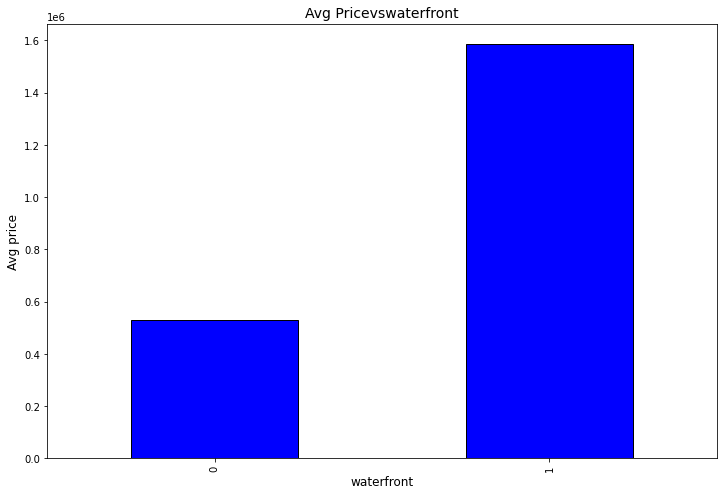

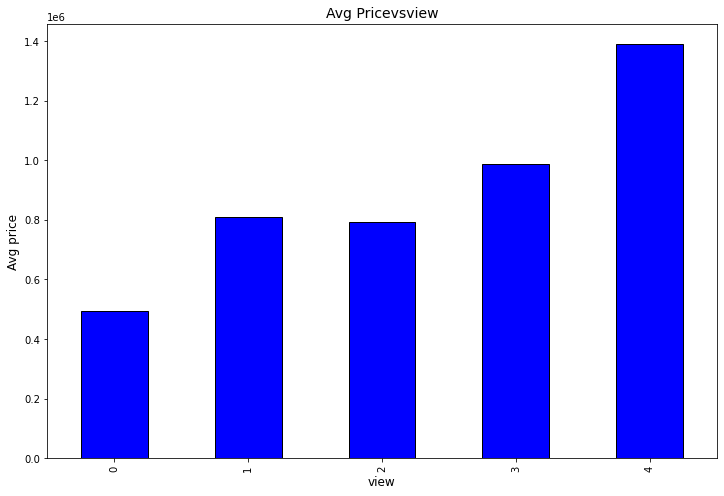

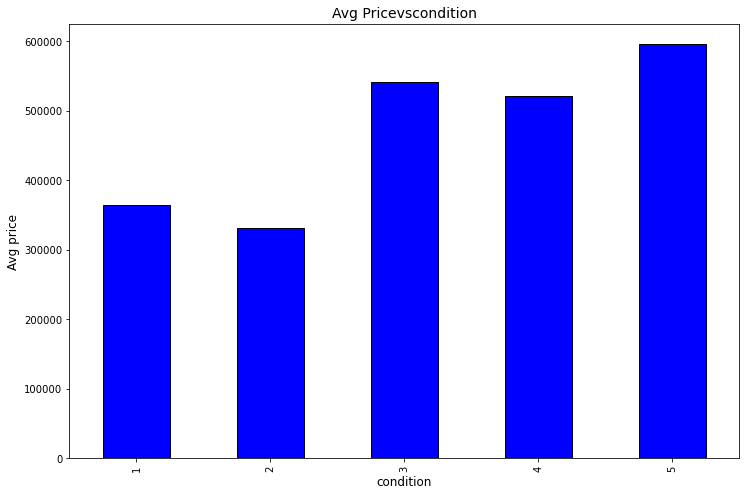

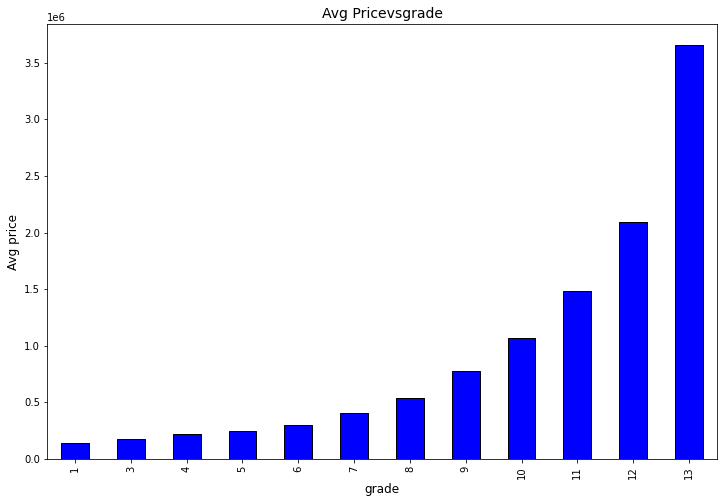

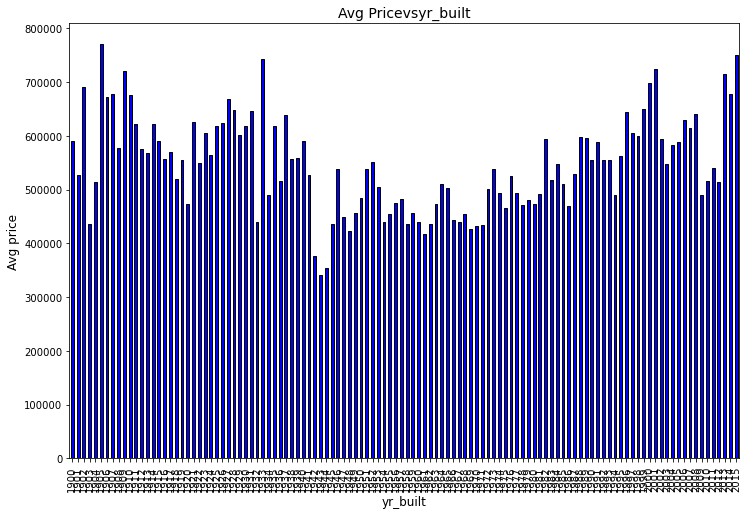

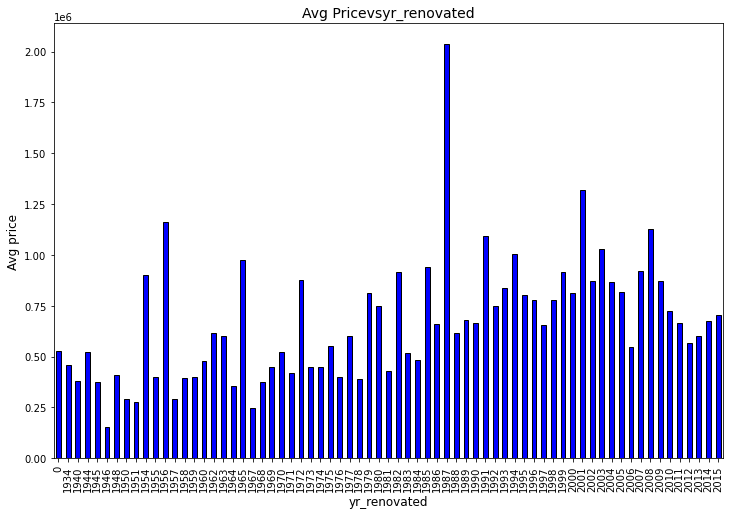

In [23]:
# Groupby aggregate summary in barplot (Discret)

cat_disc = ['waterfront', 'view', 'condition', 'grade','yr_built', 'yr_renovated']

for i in cat_disc:    
    Xy_train.groupby([i])['price'].mean().plot(kind='bar',figsize=(12,8),color="blue",fontsize=10,edgecolor="black")
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Avg price',fontsize=12)
    plt.title('Avg Price'+ 'vs'+i ,fontsize=14)
    plt.show()

In [24]:
#Box Plot

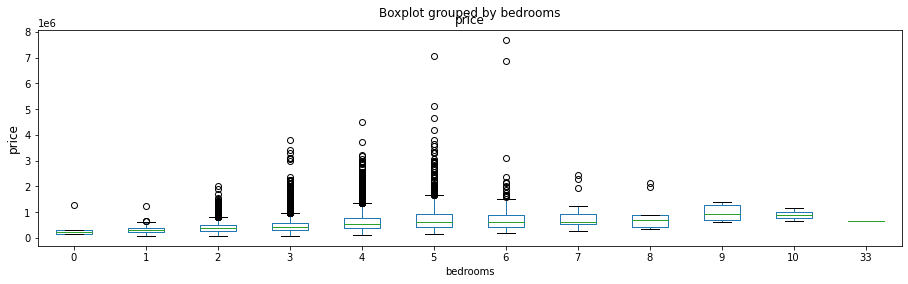

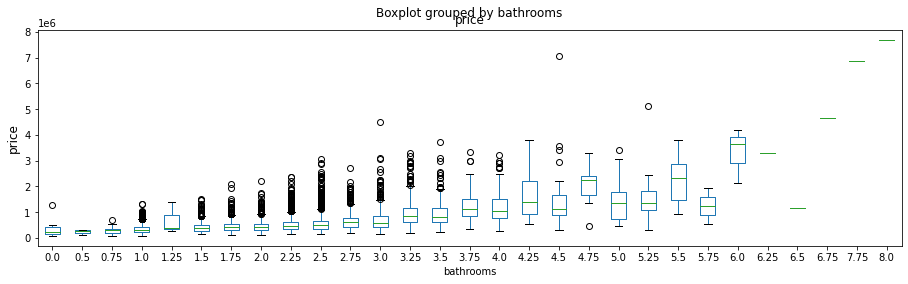

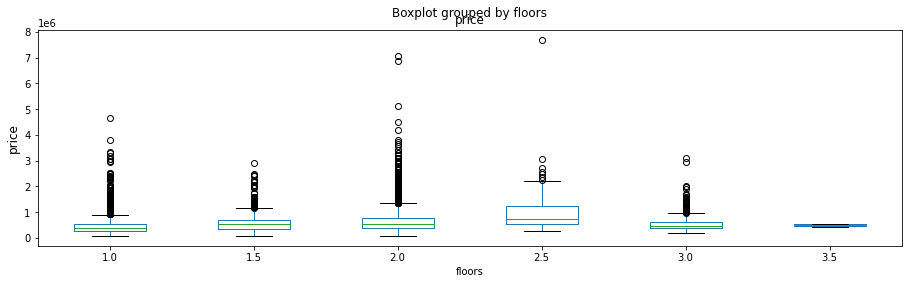

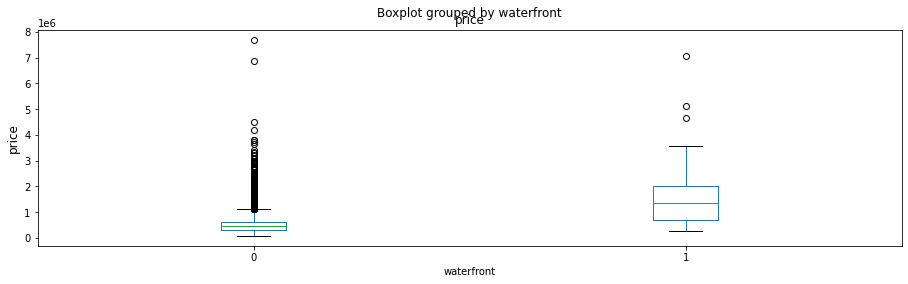

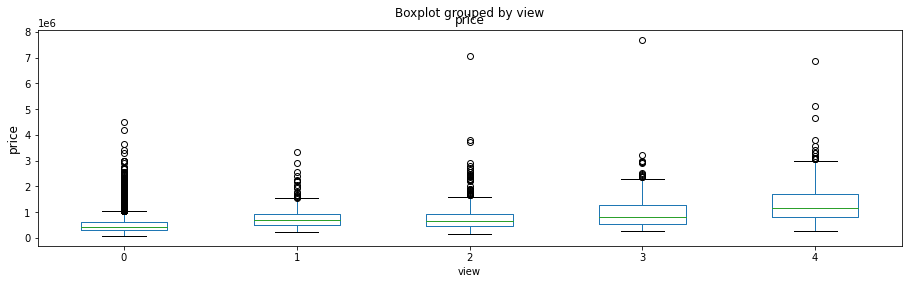

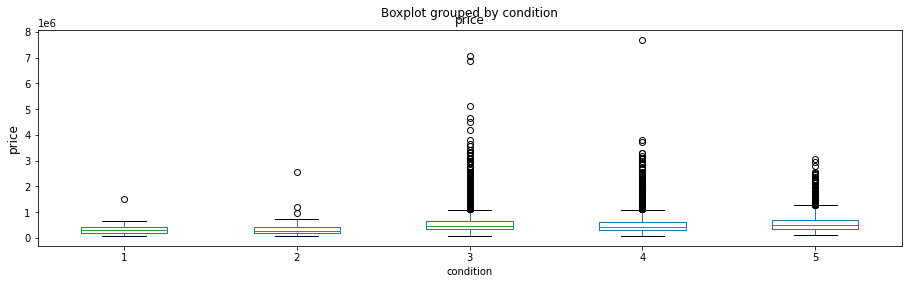

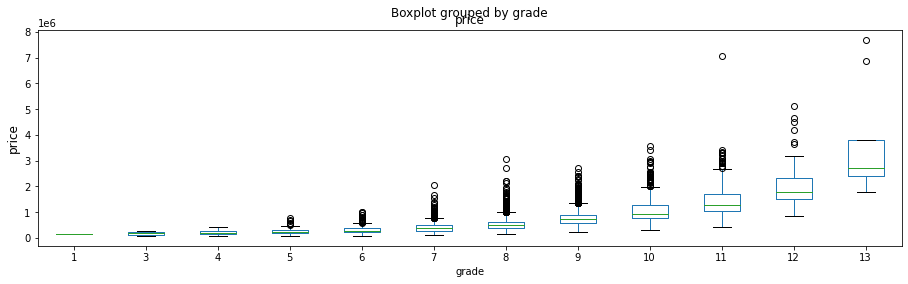

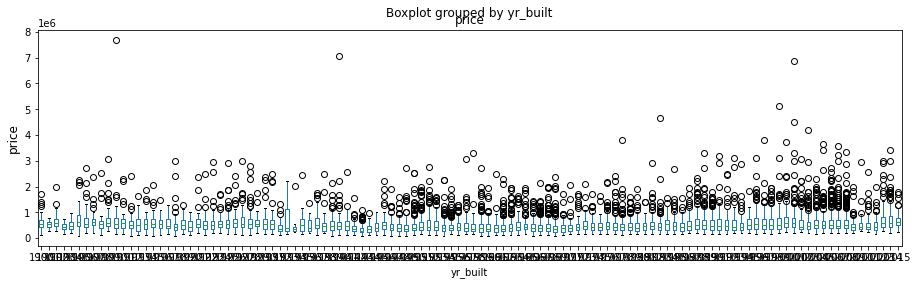

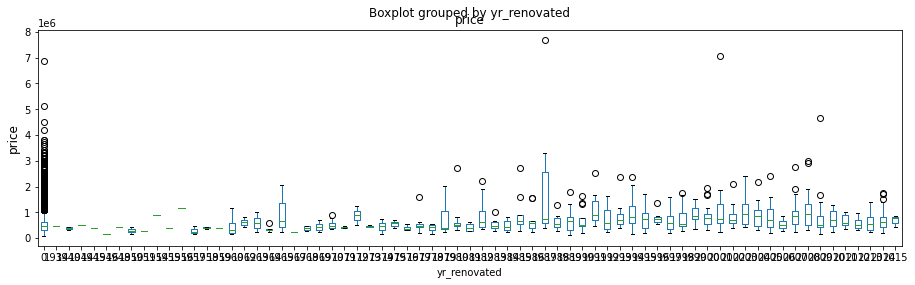

In [25]:
cat_disc = ['bedrooms','bathrooms','floors', 'waterfront', 'view', 'condition', 'grade','yr_built', 'yr_renovated']

for i in cat_disc:
    Xy_train.boxplot(column = "price",by = i,grid = False,figsize = (15,4),rot =0) 
    plt.ylabel("price",fontsize =12)
    plt.show()

In [26]:
#INSIGHTS

In [27]:
#CORRELATION:
#Strength of correlation 0.5 and above _ [sqft_living15,sqft_above,grade,sqft_living,bathrooms] vs price
#Strength of correlation 0.2 to 0.49 _ [sqft_basement,view,waterfront,floors,bedrooms] vs price
#Strength of correlation 0 to 0.19 _ [sqft_lot15,yr_renovated,yr_built,condition,sqft_lot] vs price
#Negative correlation _ [Nil]
#Other variables _ [long,lat,zipcode,id,date]

#### 8.VALIDATION SPLIT FROM TRAIN DATA

In [28]:
#From the train data now we can split the validation data which can be used to validate the trained model over this data.
#The test data kept under complete darkness for final testing of the model.
#Here we are again making 70:30 split,which is 30% of 70% which is 0.43
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.43,random_state=42) 

In [29]:
print("X_train:",X_train.shape)
print("X_valid:",X_valid.shape)
print("y_train:",y_train.shape)
print("y_valid:",y_valid.shape)

X_train: (8623, 20)
X_valid: (6506, 20)
y_train: (8623,)
y_valid: (6506,)


#### 9.DATA PREPROCESSING (X_train)

In [30]:
#Checking for Null values
X_train.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       1
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [31]:
#Checking for Duplicates
X_train.duplicated().sum()

0

##### <u>9.a.Fixing the dataset

<AxesSubplot:xlabel='sqft_above'>

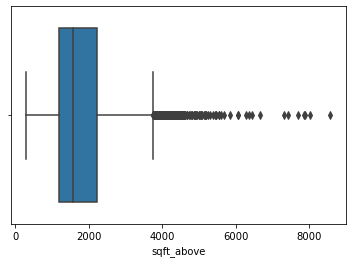

In [32]:
# Boxplot to understand the distribution of data for filling the missing values
sns.boxplot(X_train["sqft_above"])

In [33]:
#Filling null with median value of sqft_above since the data is skewed
X_train["sqft_above"].fillna(int(X_train["sqft_above"].median()),inplace=True)

In [34]:
#Checking for Null values again 
X_train.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 10. MODEL FITTING

#### 10.A.LINEAR REGRESSION

#### <U> TRIAL 1
#### Fitting with all variables

In [35]:
# Drop the variable date(string)
X_train = X_train.drop("date",axis=1)

In [36]:
#Variables used in Trial1
X_train.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [37]:
#Importing Linear Regression from Skict learn library
from sklearn.linear_model import LinearRegression

##### <U>MODEL TRAINING

In [38]:
#Fitting the linear model to the train dataset for the model to get trained
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [43]:
#Point of intercept of the Regression line over yaxis
reg.intercept_

7158365.757548378

In [44]:
#the regressors of each predictor variable  which determines the prediction
reg.coef_

array([-1.82984804e-06, -3.37297581e+04,  2.81931296e+04, -5.51316416e+02,
        1.29541482e-02,  6.73729584e+03,  5.42686369e+05,  5.15477139e+04,
        2.49780155e+04,  9.53483504e+04,  7.43814336e+02,  7.11727296e+02,
       -2.52132869e+03,  2.52184731e+01, -5.89745461e+02,  5.91224747e+05,
       -2.19914130e+05,  1.41376190e+01, -3.78464431e-01])

In [45]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
reg.score(X_train,y_train)

0.690243887337994

##### <U> MODEL VALIDATION

#### 1)Train data (Insample)

In [68]:
reg_pred = reg.predict(X_train)
reg_pred

array([178102.5121204 , 425052.90666985, 209593.52802568, ...,
       569863.52369677, 373726.88078259, 373777.00196289])

##### Evaluation the model(Insample data)

In [69]:
#MAE (mean absolute error)
np.mean(np.abs(y_train-reg_pred))

124775.10392074702

In [70]:
#MSE
np.mean((y_train -reg_pred)**2)

39348686653.94373

In [71]:
#RMSE
np.sqrt(np.mean((y_train-reg_pred)**2))

198365.03384907264

In [72]:
#MAPE
np.mean(np.abs(y_train-reg_pred)/y_train)*100

25.474914420286698

#### 2)Validation data(Outofsample)

In [61]:
# Drop the variable date(string)
X_valid = X_valid.drop("date",axis=1)

In [62]:
reg_pred = reg.predict(X_valid)
reg_pred

array([458743.95848384, 775807.107682  , 391549.8440286 , ...,
       527297.18201219, 135361.01956683, 512654.4625396 ])

##### Evaluation the model(Outofsample)

In [63]:
#MAE (mean absolute error)
np.mean(np.abs(y_valid-reg_pred))

125100.48997090152

In [64]:
#MSE
np.mean((y_valid -reg_pred)**2)

39252248418.327095

In [65]:
#RMSE
np.sqrt(np.mean((y_valid-reg_pred)**2))

198121.80197627694

In [66]:
#MAPE
np.mean(np.abs(y_valid-reg_pred)/y_valid)*100

25.602096784829808

In [ ]:
err_metrics = pd.DataFrame({"Mae":[mae],"Mse":[mse2],"Rmse":[rmse2],"Mape":[mape2]})
err_metrics = err_metrics.rename(index={0:"Trial1:"})


#### <U> TRIAL 2

#### Dropping the variable which are weakly correlated to Price 


In [169]:
#id,zipcode,lat,lon
X_train = X_train.drop(['id','zipcode','lat','long'],axis=1)

In [170]:
#Variables used in Trial1
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

##### <U>MODEL TRAINING

In [171]:
#Fitting the linear model to the train dataset for the model to get trained
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [172]:
#Point of intercept of the Regression line over yaxis
reg.intercept_

5999133.499292901

In [173]:
#the regressors of each predictor variable  which determines the prediction
reg.coef_

array([-3.71117391e+04,  3.04027179e+04, -5.27884007e+02, -1.21041729e-01,
        2.84007342e+04,  5.34261326e+05,  4.03625028e+04,  1.58007366e+04,
        1.19163086e+05,  7.00789544e+02,  7.09399413e+02, -3.45509763e+03,
        1.71440938e+01,  1.70226270e+01, -5.07750204e-01])

In [174]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
reg.score(X_train,y_train)

0.6426591465632566

##### <U> MODEL VALIDATION

In [175]:
X_valid = X_valid.drop(['id','zipcode','lat','long'],axis=1)

In [176]:
reg_pred = reg.predict(X_valid)
reg_pred

array([537888.31213489, 687148.97089237, 325384.34445212, ...,
       580842.08813437, 284942.09381555, 453171.96482189])

##### <U> EVALUATING THE MODEL

In [177]:
#MAE (mean absolute error)
np.mean(np.abs(y_valid-reg_pred))

137739.9461839288

In [178]:
#MSE
np.mean((y_valid -reg_pred)**2)

45128316379.05613

In [179]:
#RMSE
np.sqrt(np.mean((y_valid-reg_pred)**2))

212434.26366538927

In [180]:
#MAPE
np.mean(np.abs(y_valid-reg_pred)/y_valid)*100

28.913544532375578

#### <U> TRIAL 3

#### Dropping the variable sqft_living,sqft_lot because there is already a newer and current variable sqft_living15,sqft_lot15


In [181]:
X_train = X_train.drop(['sqft_living','sqft_lot'],axis=1)

In [182]:
#Variables used in Trial3
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

##### <U>MODEL TRAINING

In [183]:
#Fitting the linear model to the train dataset for the model to get trained
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [184]:
#Point of intercept of the Regression line over yaxis
reg.intercept_

5987778.836286808

In [185]:
#the regressors of each predictor variable  which determines the prediction
reg.coef_

array([-3.69656297e+04,  3.03722363e+04,  2.86739301e+04,  5.34650556e+05,
        4.03367924e+04,  1.58745866e+04,  1.19161484e+05,  1.72076011e+02,
        1.81170299e+02, -3.44967318e+03,  1.72699317e+01,  1.74731946e+01,
       -6.31549000e-01])

In [186]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
reg.score(X_train,y_train)

0.6425332677580378

##### <U> MODEL VALIDATION

In [187]:
X_valid = X_valid.drop(['sqft_living','sqft_lot'],axis=1)

In [188]:
reg_pred = reg.predict(X_valid)
reg_pred

array([537455.46091649, 686964.43993883, 325291.599253  , ...,
       593571.63941553, 285158.42808693, 453157.1028525 ])

##### <U> EVALUATING THE MODEL

In [189]:
#MAE (mean absolute error)
np.mean(np.abs(y_valid-reg_pred))

137673.10305424224

In [190]:
#MSE
np.mean((y_valid -reg_pred)**2)

45099736535.29333

In [191]:
#RMSE
np.sqrt(np.mean((y_valid-reg_pred)**2))

212366.98551162166

In [192]:
#MAPE
np.mean(np.abs(y_valid-reg_pred)/y_valid)*100

28.896306827735895

#### <U> TRIAL 4

In [193]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### <u>TRANSFORMATIONS
#### 1. Log transformation of Target variable(Price)
#### 2. Making a new variable Age using Year build
#### 3. Sqft Basement to Basement present or not
#### 4. yr_renovated to renovated or not  
    


In [194]:
X_train_tranf = X_train.copy()
y_train_tranf = y_train.copy()

In [195]:
log_y = np.log(y_train_tranf)

In [196]:
log_y

6094     12.384219
15962    12.765688
19674    12.864059
9718     13.366094
19385    12.388394
           ...    
13563    13.480038
12765    13.244581
14415    13.459093
18699    12.936034
21132    12.751300
Name: price, Length: 8623, dtype: float64

In [197]:
X_train_tranf['age']=2022-X_train_tranf['yr_built']

In [198]:
X_train_tranf

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age
6094,4,1.75,1.0,0,0,4,7,1000.0,500,1977,0,1700,9020,45
15962,4,2.50,2.0,0,0,3,8,2610.0,0,2005,0,2480,5188,17
19674,2,1.50,2.0,0,0,3,7,960.0,0,2005,0,1470,1829,17
9718,3,2.50,2.0,0,0,3,9,2110.0,0,2005,0,2540,4384,17
19385,3,2.00,1.0,0,0,3,7,1553.0,0,1900,2001,1010,10546,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,4,2.50,2.0,0,0,3,9,2970.0,0,2005,0,3940,4848,17
12765,7,4.50,1.0,0,0,3,7,2070.0,2070,1978,0,1440,1865,44
14415,2,1.75,1.0,0,0,3,8,1020.0,510,1952,0,1870,5029,70
18699,5,2.75,1.0,0,0,4,7,1220.0,840,1978,0,1840,8906,44


In [199]:
X_train_tranf=X_train_tranf.drop(['yr_built'], axis=1)

In [200]:
X_train_tranf['basement_present'] = 0
X_train_tranf.loc[X_train_tranf['sqft_basement'] >0, 'basement_present'] = 1

In [201]:
X_train_tranf

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,age,basement_present
6094,4,1.75,1.0,0,0,4,7,1000.0,500,0,1700,9020,45,1
15962,4,2.50,2.0,0,0,3,8,2610.0,0,0,2480,5188,17,0
19674,2,1.50,2.0,0,0,3,7,960.0,0,0,1470,1829,17,0
9718,3,2.50,2.0,0,0,3,9,2110.0,0,0,2540,4384,17,0
19385,3,2.00,1.0,0,0,3,7,1553.0,0,2001,1010,10546,122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,4,2.50,2.0,0,0,3,9,2970.0,0,0,3940,4848,17,0
12765,7,4.50,1.0,0,0,3,7,2070.0,2070,0,1440,1865,44,1
14415,2,1.75,1.0,0,0,3,8,1020.0,510,0,1870,5029,70,1
18699,5,2.75,1.0,0,0,4,7,1220.0,840,0,1840,8906,44,1


In [202]:
X_train_tranf=X_train_tranf.drop(['sqft_basement'], axis=1)

In [203]:
X_train_tranf['renovated'] = 0
X_train_tranf.loc[X_train_tranf['yr_renovated'] >0, 'renovated'] = 1

In [226]:
X_train_tranf=X_train_tranf.drop(['yr_renovated'], axis=1)

In [227]:
X_train_tranf

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,age,basement_present,renovated
6094,4,1.75,1.0,0,0,4,7,1000.0,1700,9020,45,1,0
15962,4,2.50,2.0,0,0,3,8,2610.0,2480,5188,17,0,0
19674,2,1.50,2.0,0,0,3,7,960.0,1470,1829,17,0,0
9718,3,2.50,2.0,0,0,3,9,2110.0,2540,4384,17,0,0
19385,3,2.00,1.0,0,0,3,7,1553.0,1010,10546,122,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,4,2.50,2.0,0,0,3,9,2970.0,3940,4848,17,0,0
12765,7,4.50,1.0,0,0,3,7,2070.0,1440,1865,44,1,0
14415,2,1.75,1.0,0,0,3,8,1020.0,1870,5029,70,1,0
18699,5,2.75,1.0,0,0,4,7,1220.0,1840,8906,44,1,0


##### <U>MODEL TRAINING

In [228]:
#Fitting the linear model to the train dataset for the model to get trained
reg = LinearRegression()
reg.fit(X_train_tranf,log_y)

LinearRegression()

In [229]:
#Point of intercept of the Regression line over yaxis
reg.intercept_

10.295881815105194

In [230]:
#the regressors of each predictor variable  which determines the prediction
reg.coef_

array([-1.43419540e-02,  6.29358538e-02,  1.09397667e-01,  3.36513479e-01,
        4.35314363e-02,  3.94796965e-02,  2.05507886e-01,  1.24646291e-04,
        1.11021465e-04, -2.76794637e-07,  5.19552546e-03,  1.93730123e-01,
        4.51829459e-02])

In [231]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
reg.score(X_train_tranf,log_y)

0.6505788258424097

##### <U> MODEL VALIDATION

In [232]:
X_valid_tranf=X_valid.copy()

In [233]:
X_valid_tranf['age']=2022-X_valid_tranf['yr_built']

In [234]:
X_valid_tranf=X_valid_tranf.drop(['yr_built'], axis=1)

In [235]:
X_valid_tranf['basement_present'] = 0
X_valid_tranf.loc[X_valid_tranf['sqft_basement'] >0, 'basement_present'] = 1

In [236]:
X_valid_tranf=X_valid_tranf.drop(['sqft_basement'], axis=1)

In [237]:
X_valid_tranf['renovated'] = 0
X_valid_tranf.loc[X_valid_tranf['yr_renovated'] >0, 'renovated'] = 1

In [238]:
X_valid_tranf=X_valid_tranf.drop(['yr_renovated'], axis=1)

In [239]:
X_valid_tranf.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'age',
       'basement_present', 'renovated'],
      dtype='object')

In [240]:
X_train_tranf.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'age',
       'basement_present', 'renovated'],
      dtype='object')

In [241]:
reg_pred = reg.predict(X_valid_tranf)
reg_pred

array([13.0095383 , 13.37160234, 12.73439763, ..., 12.89295788,
       12.66368945, 13.00148767])

In [122]:
np.exp(reg_pred)

array([1.02220570e+13, 2.35289388e+13, 5.42497363e+12, ...,
       7.81551998e+12, 4.60987822e+12, 1.00343136e+13])

##### <U> EVALUATING THE MODEL

In [242]:
#MAE (mean absolute error)
np.mean(np.abs(y_valid-np.exp(reg_pred)))

127512.4198142659

In [243]:
#MSE
np.mean((y_valid -np.exp(reg_pred))**2)

37530738564.37034

In [244]:
#RMSE
np.sqrt(np.mean((y_valid-np.exp(reg_pred))**2))

193728.51768485285

In [245]:
#MAPE
np.mean(np.abs(y_valid-np.exp(reg_pred))/y_valid)*100

25.205858832584365